Task 1

Get libraries

In [133]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Get data from lab1, clear it and prepare for training

In [134]:
asteroids = pd.read_csv("asteroids.csv")
asteroids.shape
print(asteroids.keys())

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')


In [135]:
asteroids['absolute_magnitude'] = asteroids['absolute_magnitude'].astype(float)
asteroids['estimated_diameter_min'] = asteroids['estimated_diameter_min'].astype(float)
asteroids['estimated_diameter_max'] = asteroids['estimated_diameter_max'].astype(float)
asteroids['miss_distance'] = asteroids['miss_distance'].astype(float)

asteroids.dropna(inplace=True)

In [136]:
numeric_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 
                   'relative_velocity', 'miss_distance']
X = asteroids[numeric_columns]
y = asteroids['is_hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [138]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

Create model with given sizes

In [139]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[-1],)),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid"),
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,497 (666.00 KB)

 Trainable params: 168,961 (660.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

Use model to classifify data

In [140]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

model_fit = model.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test),
    verbose=2,
    epochs=15, 
    batch_size=128
)

Epoch 1/15
2114/2114 - 6s - 3ms/step - accuracy: 0.8711 - loss: 0.3737 - val_accuracy: 0.8706 - val_loss: 0.3711
Epoch 2/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8725 - loss: 0.3662 - val_accuracy: 0.8708 - val_loss: 0.3784
Epoch 3/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8728 - loss: 0.3652 - val_accuracy: 0.8707 - val_loss: 0.3997
Epoch 4/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8727 - loss: 0.3632 - val_accuracy: 0.8707 - val_loss: 0.3654
Epoch 5/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8728 - loss: 0.3630 - val_accuracy: 0.8624 - val_loss: 0.4194
Epoch 6/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8726 - loss: 0.3633 - val_accuracy: 0.8707 - val_loss: 0.3948
Epoch 7/15
2114/2114 - 4s - 2ms/step - accuracy: 0.8729 - loss: 0.3610 - val_accuracy: 0.8710 - val_loss: 0.3645
Epoch 8/15
2114/2114 - 5s - 2ms/step - accuracy: 0.8729 - loss: 0.3608 - val_accuracy: 0.8707 - val_loss: 0.3635
Epoch 9/15
2114/2114 - 5s - 2ms/step - accuracy: 0.8728 - loss: 0.3603 - val_accuracy: 0.8707 - 

Task 2 (from scratch)

Import libraries

In [141]:
import tensorflow as tf
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import os

Set sizes

In [142]:
image_width, image_height = 256, 256
batch_size = 32
data_dir = "balls"

Resize images and get data from dirs

In [143]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(data_dir, 'test'),
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    seed=42
)

Found 1209 files belonging to 3 classes.
Found 305 files belonging to 3 classes.


Check several images to see if resize is working

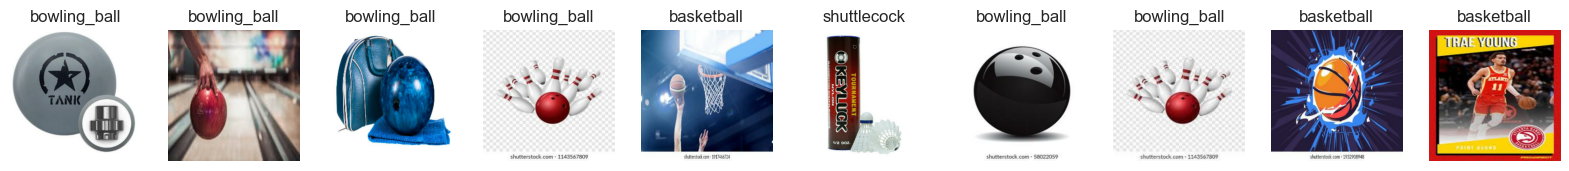

In [144]:
class_names = train_ds.class_names
n = 10
plt.figure(figsize=(20, 4))
for images, labels in train_ds.take(1):
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

Normalise images

In [145]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Create model

In [146]:
model = keras.Sequential([
    layers.Input(shape=(256, 256, 3)),

    layers.Conv2D(32, (3, 3), padding="same"),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(64, (3, 3), padding="same"),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(128, (3, 3), padding="same"),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(256, (3, 3), padding="same"),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),

    layers.Dense(512),
    layers.LeakyReLU(),

    layers.Dense(3, activation="softmax")
])

Compile model

In [147]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [148]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,944,899 (129.49 MB)

 Trainable params: 33,944,899 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

Train model with early stopping

In [149]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step - accuracy: 0.3789 - loss: 4.4391 - val_accuracy: 0.5705 - val_loss: 0.9324
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.5634 - loss: 0.9299 - val_accuracy: 0.6754 - val_loss: 0.7696
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 336ms/step - accuracy: 0.6951 - loss: 0.7278 - val_accuracy: 0.6918 - val_loss: 0.7243
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 340ms/step - accuracy: 0.6978 - loss: 0.6558 - val_accuracy: 0.6525 - val_loss: 0.8351
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 343ms/step - accuracy: 0.7547 - loss: 0.6350 - val_accuracy: 0.6885 - val_loss: 0.7194
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 337ms/step - accuracy: 0.7883 - loss: 0.5511 - val_accuracy: 0.7082 - val_loss: 0.7097
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 346ms/step - accuracy: 0.8144 - loss: 0.4858 - val_accuracy: 0.7443 - val_loss: 0.6503
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 375ms/step - accuracy: 0.8546 - loss: 0.4209 - val_accu

Evaluation for model from scratch

In [150]:
score = model.evaluate(test_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5788058042526245
Test accuracy: 0.7901639342308044


Test output

In [151]:
img_path = f'balls/test/basketball/basketball_28.jpg'
img_height, img_width = 256  , 256

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
print(predictions)

predicted_class = np.argmax(predictions, axis=1)

score = tf.nn.softmax(predictions[0])
print(score)
print("That's a {}!".format(class_names[np.argmax(score)]))
print("Confidence: {:.2f} %.".format(100 * np.max(score)))

print(f"Прогнозований клас: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[8.7101138e-01 1.2894621e-01 4.2366952e-05]]
tf.Tensor([0.52779496 0.2512988  0.22090633], shape=(3,), dtype=float32)
That's a basketball!
Confidence: 52.78 %.
Прогнозований клас: 0


Task 2 (transfer learning from pre-trained weights)

In [152]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [159]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', input_shape=(image_height, image_width, 3), include_top=False)


C:\Users\Maks\AppData\Local\Temp\ipykernel_22336\2935461094.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', input_shape=(image_height, image_width, 3), include_top=False)


In [160]:
base_model.trainable = False

In [161]:
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

In [162]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [163]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [164]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.7138 - loss: 0.6903 - val_accuracy: 0.9443 - val_loss: 0.1391
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.9616 - loss: 0.1130 - val_accuracy: 0.9705 - val_loss: 0.0939
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.9748 - loss: 0.0749 - val_accuracy: 0.9738 - val_loss: 0.0807
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.9860 - loss: 0.0412 - val_accuracy: 0.9639 - val_loss: 0.0946
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.9911 - loss: 0.0327 - val_accuracy: 0.9672 - val_loss: 0.0728
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9672 - val_loss: 0.0796
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9705 - val_loss: 0.0672
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.9992 - loss: 0.0096 - val_accuracy: 0

In [165]:
score = model.evaluate(test_ds, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06722066551446915
Test accuracy: 0.9704918265342712


In [166]:
img_path = f'balls/test/basketball/basketball_28.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(image_height, image_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

confidence = np.max(predictions[0]) * 100
print("That's a {}!".format(class_names[predicted_class[0]]))
print("Confidence: {:.2f}%".format(confidence))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
That's a basketball!
Confidence: 100.00%


Task 3 (from scratch)

In [181]:
import string
import re
from nltk.corpus import stopwords
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

Read csv

In [168]:
df = pd.read_csv('reviews.csv')
print(df.shape)
print(df.head())

(309103, 13)
   recommendationid language  \
0         153560814  english   
1         153560623  english   
2         153560414  english   
3         153560343  english   
4         153559963  english   

                                              review  timestamp_created  \
0          This game hits all the right marks. 10/10         1702542971   
1     took me like 11 hours to understand the basics         1702542657   
2  10/10 game play and story! It's my first turn ...         1702542275   
3                               gale is so baby girl         1702542158   
4                    YES,\n\nWITHOUT A F****N DOUBT.         1702541518   

   timestamp_updated  voted_up  votes_up  votes_funny  weighted_vote_score  \
0         1702542971      True         0            0                  0.0   
1         1702542657      True         0            0                  0.0   
2         1702542275      True         0            0                  0.0   
3         1702542158      True 

Clear text and get important rows

In [169]:
stop_words = stopwords.words('english')

def clear_text(text):
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

df_clean = df[['review', 'voted_up']].copy()
df_clean = df_clean.dropna()
print(df_clean.shape)

df_clean['review'] = df_clean['review'].apply(clear_text)
print(df_clean.head())

(308086, 2)
                                              review  voted_up
0                             game hits right marks       True
1                  took like hours understand basics      True
2   game play story first turn based rpg game lov...      True
3                                     gale baby girl      True
4                             yes without f n doubt       True


In [170]:
positive_reviews = df_clean[df_clean['voted_up'] == True]['review'].values
negative_reviews = df_clean[df_clean['voted_up'] == False]['review'].values

Split text

In [190]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['review'], df_clean['voted_up'], test_size=0.30)

Tokenization

In [172]:
vocab_size = 10000
oov_token = ""
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [173]:
X_train_text_sequences = tokenizer.texts_to_sequences(X_train)
X_test_text_sequences = tokenizer.texts_to_sequences(X_test)

In [174]:
max_length = 100
padding_type = "post"
trunction_type="post"
X_train = keras.utils.pad_sequences(X_train_text_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)
X_test = keras.utils.pad_sequences(X_test_text_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)
X_train.shape

(215660, 100)

Create model

In [175]:
emb_dim = 128
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, emb_dim))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

Compile model

In [176]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy']
)

Train model

In [177]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=256, verbose=1)

Epoch 1/2
843/843 ━━━━━━━━━━━━━━━━━━━━ 117s 138ms/step - accuracy: 0.9666 - loss: 0.1505 - val_accuracy: 0.9669 - val_loss: 0.1331
Epoch 2/2
843/843 ━━━━━━━━━━━━━━━━━━━━ 114s 136ms/step - accuracy: 0.9704 - loss: 0.0948 - val_accuracy: 0.9758 - val_loss: 0.0722


Results

In [178]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

2889/2889 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.9762 - loss: 0.0713
0.07218452543020248
0.9757536053657532


Task 3 (pretrained word embeddings)

In [186]:
import numpy as np
from keras.utils import pad_sequences

Tokenize

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df_clean['review'], df_clean['voted_up'], test_size=0.30)

In [200]:
tokenizer = Tokenizer(num_words=vocab_size)

In [201]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [202]:
max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

Use Glove as pretrained embedding

In [203]:
embedding_dim = 100
glove_path = "glove.6B.100d.txt"
embedding_index = {}

with open(glove_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

Create embedding matrix

In [204]:
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Get model

In [205]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Compile model

In [206]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Fit model for text

In [207]:
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test), batch_size=256, verbose=1)

Epoch 1/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 96s 113ms/step - accuracy: 0.9591 - loss: 0.1771 - val_accuracy: 0.9675 - val_loss: 0.1441
Epoch 2/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 136s 162ms/step - accuracy: 0.9664 - loss: 0.1474 - val_accuracy: 0.9675 - val_loss: 0.1436
Epoch 3/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 93s 110ms/step - accuracy: 0.9673 - loss: 0.1443 - val_accuracy: 0.9675 - val_loss: 0.1434
Epoch 4/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.9665 - loss: 0.1468 - val_accuracy: 0.9675 - val_loss: 0.1436
Epoch 5/5
843/843 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.9665 - loss: 0.1470 - val_accuracy: 0.9675 - val_loss: 0.1441


Results

In [208]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(loss)
print(accuracy)

2889/2889 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9670 - loss: 0.1458
0.1440500169992447
0.9675091505050659
